In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

In [1]:
base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"


In [2]:
import os

file_path = base + "train.csv"
size_mb = os.path.getsize(file_path) / (1024*1024)
size_mb


4.435338973999023

In [3]:
import pandas as pd

base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(base + "train.csv")
df_sample = pd.read_csv(base + "sample_submission.csv")

print("Train shape:", df_train.shape)
df_train.head()


Train shape: (67914, 8)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [4]:
print("Train shape:", df_train.shape)
print("\nColumns:", df_train.columns)

df_train.info()
df_train.describe(include="all")


Train shape: (67914, 8)

Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
count,67914,67914,67914.000000,67914,36096.000000,36096.000000,36096.000000,36096.000000
unique,15000,15,NaN,17,NaN,NaN,NaN,NaN
top,03e6ecfa6f6fb33dfeac6ca4f9b459c9,No finding,NaN,R9,NaN,NaN,NaN,NaN
freq,57,31818,NaN,15708,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.979312,NaN,1051.332696,1065.262051,1492.269337,1456.660489
std,NaN,NaN,5.036494,NaN,565.838078,552.925133,595.384126,581.134138
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,68.000000,103.000000
25%,NaN,NaN,7.000000,NaN,602.000000,627.000000,1010.000000,1009.000000
50%,NaN,NaN,13.000000,NaN,1014.500000,935.000000,1567.000000,1411.000000
75%,NaN,NaN,14.000000,NaN,1457.000000,1471.000000,1947.000000,1911.000000


In [5]:
df_train['class_name'].value_counts()


class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64

In [41]:
(df_train['class_name'] == "No finding").sum()


31818

In [7]:
df_train['image_id'].nunique()


15000

In [9]:
df_train.isna().sum()


image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

## import os
import pandas as pd
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
import random

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

# File size check
file_path = BASE + "train.csv"
size_mb = os.path.getsize(file_path) / (1024*1024)
size_mb

In [10]:
df_train = pd.read_csv(BASE + "train.csv")
df_sample = pd.read_csv(BASE + "sample_submission.csv")

print("Train shape:", df_train.shape)
print("Columns:", df_train.columns)

df_train.head()
df_train.info()
df_train.describe(include="all")

df_train['class_name'].value_counts()
print("No finding count:", (df_train['class_name']=="No finding").sum())
print("Unique images:", df_train['image_id'].nunique())
df_train.isna().sum()

NameError: name 'BASE' is not defined

(-0.5, 2259.5, 2689.5, -0.5)

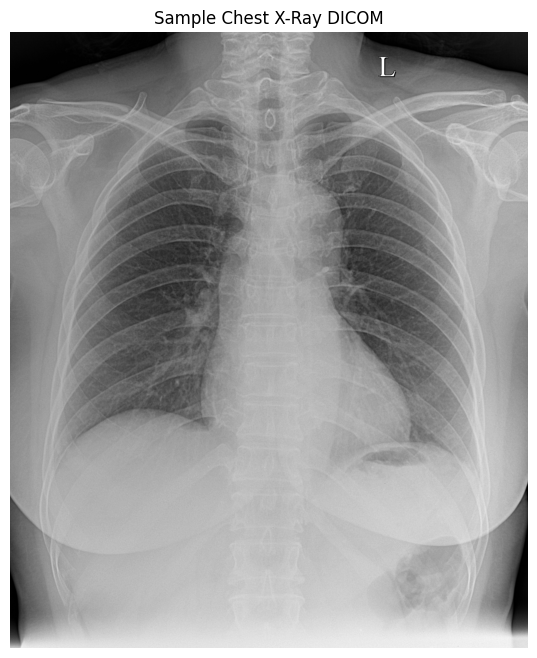

In [11]:
test_path = BASE + "test/"
sample_file = random.choice(os.listdir(test_path))
dicom_path = os.path.join(test_path, sample_file)

ds = pydicom.dcmread(dicom_path)
img = ds.pixel_array

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title("Sample Chest X-Ray DICOM")
plt.axis('off')

In [11]:
BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(BASE + "train.csv")
df_sample = pd.read_csv(BASE + "sample_submission.csv")

print("Train shape:", df_train.shape)
print("Columns:", df_train.columns)

df_train.head()


Train shape: (67914, 8)
Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [12]:

#     IMPORT LIBRARIES

import os
import cv2
import pydicom
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
TRAIN_DICOM = BASE + "train/"
TRAIN_CSV = BASE + "train.csv"

# Create output dirs
OUTPUT_DIR = "/kaggle/working/processed_images/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR + "images/", exist_ok=True)
os.makedirs(OUTPUT_DIR + "labels/", exist_ok=True)


In [13]:
df = pd.read_csv(TRAIN_CSV)

# for  1000 images
unique_imgs = df['image_id'].unique()[:1000]
df = df[df['image_id'].isin(unique_imgs)]

print("Processing images:", len(unique_imgs))


Processing images: 1000


In [14]:
def load_dicom(path):
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)
    return img


In [15]:
def clahe(img):
    c = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return c.apply(img)

print(" clahe() function loaded.")


 clahe() function loaded.


In [16]:
def denoise(img):
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.medianBlur(img, 3)
    return img

print("denoise() function loaded.")


denoise() function loaded.


In [17]:
def crop_borders(img, border=10):
    h, w = img.shape
    return img[border:h-border, border:w-border]

print(" crop_borders() function loaded.")


 crop_borders() function loaded.


In [18]:
def pad_to_square(img):
    h, w = img.shape
    size = max(h, w)
    padded = np.zeros((size, size), dtype=np.uint8)
    padded[:h, :w] = img
    return padded

print(" pad_to_square() function loaded.")


 pad_to_square() function loaded.


In [19]:
def resize(img, size=512):
    return cv2.resize(img, (size, size))

print(" resize() function loaded.")



 resize() function loaded.


In [20]:
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box

    w = x_max - x_min
    h = y_max - y_min
    xc = x_min + w/2
    yc = y_min + h/2

    return [
        0,                # class_id
        xc / img_w,       # x_center
        yc / img_h,       # y_center
        w / img_w,        # width
        h / img_h         # height
    ]

print(" convert_to_yolo() function loaded.")

    


 convert_to_yolo() function loaded.


In [21]:
import pandas as pd

TRAIN_CSV = BASE + "train.csv"   # or your correct path
df_train = pd.read_csv(TRAIN_CSV)

print(" df_train loaded successfully!")
print(df_train.head())


 df_train loaded successfully!
                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [39]:
yolo_annotations = {}

for _, row in df_train.iterrows():
   img_id = row["image_id"]
   box = [row["x_min"], row["y_min"], row["x_max"], row["y_max"]]

    if img_id not in yolo_annotations:
        yolo_annotations[img_id] = []

    yolo_annotations[img_id].append(
       convert_to_yolo(box, row["width"], row["height"])
    )

print("YOLO annotations dictionary created.")


IndentationError: unexpected indent (1471363276.py, line 7)

In [23]:
df_train.columns


Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')

In [24]:
def get_image_size(image_id):
    dicom_path = os.path.join(BASE + "train/", image_id + ".dicom")
    d = pydicom.dcmread(dicom_path)
    h, w = d.pixel_array.shape
    return w, h


In [25]:
df_train.columns.tolist()


['image_id',
 'class_name',
 'class_id',
 'rad_id',
 'x_min',
 'y_min',
 'x_max',
 'y_max']

In [26]:
import os
import cv2
import pydicom
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
train_path = BASE + "train/"


In [27]:
df_train = pd.read_csv(BASE + "train.csv")
df_train.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [28]:
def get_image_size(image_id):
    dicom_path = os.path.join(train_path, image_id + ".dicom")
    d = pydicom.dcmread(dicom_path)
    arr = d.pixel_array
    h, w = arr.shape
    return w, h


In [29]:
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box

    w = x_max - x_min
    h = y_max - y_min
    xc = x_min + w / 2
    yc = y_min + h / 2

    return [
        0,               # class_id (set to 0 for now)
        xc / img_w,
        yc / img_h,
        w / img_w,
        h / img_h
    ]


In [30]:
# 1. Load DICOM
def load_dicom(path):
    d = pydicom.dcmread(path)
    img = d.pixel_array.astype(float)
    return img

# 2. Min-Max Normalize
def normalize(img):
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    return (img * 255).astype("uint8")

# 3. CLAHE
def apply_clahe(img):
    c = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return c.apply(img)

# 4. Light Denoising
def denoise(img):
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.medianBlur(img, 3)
    return img

# 5. Crop borders
def crop_borders(img, border=10):
    h, w = img.shape
    return img[border:h-border, border:w-border]

# 6. Pad to square
def pad_to_square(img):
    h, w = img.shape
    size = max(h, w)
    canvas = np.zeros((size, size), dtype=np.uint8)
    canvas[:h, :w] = img
    return canvas

# 7. Resize
def resize(img, size=512):
    return cv2.resize(img, (size, size))

# Combine all preprocessing
def preprocess_image(path):
    img = load_dicom(path)
    img = normalize(img)
    img = apply_clahe(img)
    img = denoise(img)
    img = crop_borders(img)
    img = pad_to_square(img)
    img = resize(img)
    return img


In [31]:
SAVE_DIR = "/kaggle/working/preprocessed/"
IMG_DIR = SAVE_DIR + "images/"
LBL_DIR = SAVE_DIR + "labels/"

os.makedirs(IMG_DIR, exist_ok=True)
os.makedirs(LBL_DIR, exist_ok=True)

print("Save paths ready.")


Save paths ready.


In [40]:
count = 0

for img_id, labels in tqdm(yolo_annotations.items(), total=len(yolo_annotations)):
    
    dicom_path = os.path.join(train_path, img_id + ".dicom")

    try:
        # Preprocess image
        processed_img = preprocess_image(dicom_path)

        # Save Image (PNG)
        out_path = os.path.join(IMG_DIR, img_id + ".png")
        cv2.imwrite(out_path, processed_img)

        # Save YOLO label file
        label_path = os.path.join(LBL_DIR, img_id + ".txt")

        with open(label_path, "w") as f:
            for lab in labels:
                class_id, xc, yc, w, h = lab
                f.write(f"{class_id} {xc} {yc} {w} {h}\n")

        count += 1

    except Exception as e:
        print("Skipping:", img_id, "| Error:", e)

print(f"\n Completed preprocessing {count} images with YOLO labels.")
print("Saved inside:", SAVE_DIR)


NameError: name 'yolo_annotations' is not defined

In [33]:
   !pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 82.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [34]:
import os

base_path = "/kaggle/working/preprocessed"

# Define all required folders
folders = [
    "images",
    "labels",
    "images/train",
    "images/val",
    "labels/train",
    "labels/val"
]

# Create folders
for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)
    print("Created:", path)

print("\n YOLO folder structure created successfully!")


Created: /kaggle/working/preprocessed/images
Created: /kaggle/working/preprocessed/labels
Created: /kaggle/working/preprocessed/images/train
Created: /kaggle/working/preprocessed/images/val
Created: /kaggle/working/preprocessed/labels/train
Created: /kaggle/working/preprocessed/labels/val

 YOLO folder structure created successfully!


In [35]:
import os, shutil, random
from sklearn.model_selection import train_test_split

base_path = "/kaggle/working/preprocessed"
img_path = os.path.join(base_path, "images")
lbl_path = os.path.join(base_path, "labels")

train_img = os.path.join(base_path, "images/train")
val_img = os.path.join(base_path, "images/val")
train_lbl = os.path.join(base_path, "labels/train")
val_lbl = os.path.join(base_path, "labels/val")

# Create folders
for p in [train_img, val_img, train_lbl, val_lbl]:
    os.makedirs(p, exist_ok=True)

images = os.listdir(img_path)
images = [f for f in images if f.endswith(".png")]

train_files, val_files = train_test_split(images, test_size=0.1, random_state=42)

# Move train files
for f in train_files:
    shutil.move(os.path.join(img_path, f), os.path.join(train_img, f))
    label = f.replace(".png", ".txt")
    shutil.move(os.path.join(lbl_path, label), os.path.join(train_lbl, label))

# Move val files
for f in val_files:
    shutil.move(os.path.join(img_path, f), os.path.join(val_img, f))
    label = f.replace(".png", ".txt")
    shutil.move(os.path.join(lbl_path, label), os.path.join(val_lbl, label))

print(f"Train images: {len(train_files)}, Val images: {len(val_files)}")


ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [36]:
data_yaml = """
path: /kaggle/working/preprocessed
train: images/train
val: images/val

names:
  0: class_0
  1: class_1
"""

with open("/kaggle/working/preprocessed/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created!")


data.yaml created!


In [37]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano model
model.train(
    data="/kaggle/working/preprocessed/data.yaml",
    epochs=25,
    imgsz=512,
    batch=16,
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.232 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/preprocessed/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=

FileNotFoundError: [34m[1mtrain: [0mError loading data from /kaggle/working/preprocessed/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

In [38]:
!ls -R /kaggle/working/



/kaggle/working/:
preprocessed  processed_images	runs  yolov8n.pt

/kaggle/working/preprocessed:
data.yaml  images  labels

/kaggle/working/preprocessed/images:
train  val

/kaggle/working/preprocessed/images/train:

/kaggle/working/preprocessed/images/val:

/kaggle/working/preprocessed/labels:
train  val

/kaggle/working/preprocessed/labels/train:

/kaggle/working/preprocessed/labels/val:

/kaggle/working/processed_images:
images	labels

/kaggle/working/processed_images/images:

/kaggle/working/processed_images/labels:

/kaggle/working/runs:
detect

/kaggle/working/runs/detect:
train

/kaggle/working/runs/detect/train:
args.yaml  weights

/kaggle/working/runs/detect/train/weights:


In [ ]:
import os

for root, dirs, files in os.walk("/kaggle", topdown=True):
    for f in files:
        if f.endswith(".png"):
            print(os.path.join(root, f))


In [ ]:
!find /kaggle -maxdepth 4 -type d


In [ ]:
import os

print("Searching for .png images...\n")
found = False

for root, dirs, files in os.walk("/kaggle"):
    for f in files:
        if f.endswith(".png"):
            print(os.path.join(root, f))
            found = True

if not found:
    print("❌ No PNG images found — your preprocessing may not have saved correctly.")


In [42]:
import os
import pandas as pd
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import random


In [43]:
BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(BASE + "train.csv")

print("Train shape:", df_train.shape)
print("Columns:", df_train.columns)
print("Unique images:", df_train['image_id'].nunique())


Train shape: (67914, 8)
Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
Unique images: 15000


In [44]:
# Read DICOM
def load_dicom(path):
    d = pydicom.dcmread(path)
    img = d.pixel_array.astype(np.float32)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = (img * 255).astype(np.uint8)
    return img


# Apply CLAHE
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)


# Resize
def resize_image(img, size=512):
    return cv2.resize(img, (size, size))


# Denoise
def denoise(img):
    return cv2.fastNlMeansDenoising(img, h=10)


# Convert bbox → YOLO
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box
    x_center = (x_min + x_max) / 2 / img_w
    y_center = (y_min + y_max) / 2 / img_h
    w = (x_max - x_min) / img_w
    h = (y_max - y_min) / img_h
    return [x_center, y_center, w, h]


In [45]:
OUT = "/kaggle/working/preprocessed/"

IMG_OUT = OUT + "images/train/"
LBL_OUT = OUT + "labels/train/"

os.makedirs(IMG_OUT, exist_ok=True)
os.makedirs(LBL_OUT, exist_ok=True)

print("Output folders created.")


Output folders created.


In [ ]:
TARGET = 1500

# List of unique image IDs
image_list = df_train['image_id'].unique()

# Already processed count
done = len(os.listdir(IMG_OUT))
print("Already processed:", done)

start = done   # resume point
end = min(start + (TARGET - done), TARGET)

print(f"Processing images {start} to {end}...")

for img_id in tqdm(image_list[start:end]):

    dicom_path = BASE + f"train/{img_id}.dicom"
    img = load_dicom(dicom_path)

    # store original sizes
    orig_h, orig_w = img.shape

    # preprocessing
    img = apply_clahe(img)
    img = denoise(img)
    img = resize_image(img)

    # save image
    out_path = IMG_OUT + f"{img_id}.png"
    cv2.imwrite(out_path, img)

    # YOLO labels
    rows = df_train[df_train["image_id"] == img_id]

    with open(LBL_OUT + f"{img_id}.txt", "w") as f:
        for _, r in rows.iterrows():
            if r["class_name"] == "No finding":
                continue

            box = [r["x_min"], r["y_min"], r["x_max"], r["y_max"]]
            yolo = convert_to_yolo(box, orig_w, orig_h)
            cls = r["class_id"]

            f.write(f"{cls} {' '.join(map(str, yolo))}\n")

print("✅ Completed preprocessing", len(os.listdir(IMG_OUT)), "images")


Already processed: 0
Processing images 0 to 1500...


100%|██████████| 1500/1500 [4:18:25<00:00, 10.34s/it]  

✅ Completed preprocessing 1500 images


In [47]:
from sklearn.model_selection import train_test_split

all_imgs = os.listdir(IMG_OUT)
train_imgs, val_imgs = train_test_split(all_imgs, test_size=0.1, random_state=42)

# Make folders
os.makedirs(OUT + "images/val/", exist_ok=True)
os.makedirs(OUT + "labels/val/", exist_ok=True)

# Move val images + labels
for img in val_imgs:
    label_file = img.replace(".png", ".txt")

    shutil.copy2(IMG_OUT + img, OUT + "images/val/" + img)
    shutil.copy2(LBL_OUT + label_file, OUT + "labels/val/" + label_file)

print("Train:", len(train_imgs), " Val:", len(val_imgs))


Train: 1350  Val: 150


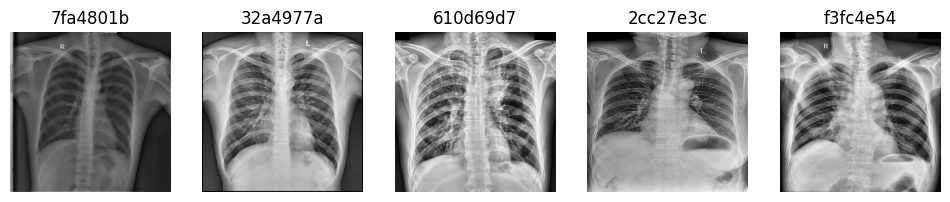

In [48]:
sample_ids = random.sample(train_imgs, 5)

plt.figure(figsize=(12,8))

for i, img_name in enumerate(sample_ids):
    img_path = IMG_OUT + img_name
    img = cv2.imread(img_path, 0)

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(img_name[:8])
    plt.axis("off")

plt.show()


In [49]:
import os

PREPROCESSED_DIR = "/kaggle/working/preprocessed/"

print("Exists:", os.path.exists(PREPROCESSED_DIR))
print("Contents:", os.listdir(PREPROCESSED_DIR) if os.path.exists(PREPROCESSED_DIR) else "Folder not found")


Exists: True
Contents: ['data.yaml', 'images', 'labels']


In [50]:
import os

base = "/kaggle/working/preprocessed/images/"

print("Train exists:", os.path.exists(base + "train"))
print("Valid exists:", os.path.exists(base + "valid"))
print("Test exists:", os.path.exists(base + "test"))

print("Train count:", len(os.listdir(base + "train")) if os.path.exists(base + "train") else 0)
print("Valid count:", len(os.listdir(base + "valid")) if os.path.exists(base + "valid") else 0)
print("Test count:", len(os.listdir(base + "test")) if os.path.exists(base + "test") else 0)


Train exists: True
Valid exists: False
Test exists: False
Train count: 1500
Valid count: 0
Test count: 0


In [51]:
base_labels = "/kaggle/working/preprocessed/labels/"

print("Train labels:", len(os.listdir(base_labels + "train")))
print("Valid labels:", len(os.listdir(base_labels + "valid")))
print("Test labels:", len(os.listdir(base_labels + "test")))


Train labels: 1500


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/preprocessed/labels/valid'

In [52]:
import os

for f in ["train", "val", "test"]:
    path = base_labels + f
    print(f, "exists:", os.path.exists(path))


train exists: True
val exists: True
test exists: False


In [54]:
!pip install torch torchvision --quiet

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


In [55]:
DATA_DIR = "/kaggle/working/preprocessed/images/"

TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

print("Train exists:", os.path.exists(TRAIN_DIR))
print("Val   exists:", os.path.exists(VAL_DIR))

print("Train samples:", len(os.listdir(TRAIN_DIR)))
print("Val samples:", len(os.listdir(VAL_DIR)))


Train exists: True
Val   exists: True
Train samples: 1500
Val samples: 150


In [56]:
import os

PRE_IMG_DIR = "/kaggle/working/preprocessed/images/train/"

print("Exists:", os.path.exists(PRE_IMG_DIR))

sample_files = os.listdir(PRE_IMG_DIR)[:10]
print("Sample filenames:\n", sample_files)


Exists: True
Sample filenames:
 ['7d610aae49bf4f979e16c2d8859f5f87.png', '4c25ea1a88a172df4226c96bd4a4d9ed.png', '9da10c35993dacbb939b17bc65e31e2e.png', 'ba5e3409250a85483d6e39be759bc102.png', '761156f763bd414dfd2037ae413d5fe8.png', 'e46da7c27c2e93d1a1d9413e2fee4547.png', '764205f702d380f8a4da5cffa538f48d.png', 'ae7e40fec9afc78a66a48232532faa07.png', '76218624c7da972d76e09fa47edca768.png', '4db77a5ffb5fa45be829a1cb9f6bc281.png']


In [58]:
import os

label_root = "/kaggle/working/preprocessed/labels"

splits = ["train", "val"]
image_labels = {}

for split in splits:
    split_path = os.path.join(label_root, split)

    for file_name in os.listdir(split_path):
        if not file_name.endswith(".txt"):
            continue

        image_id = file_name.replace(".txt", "")
        label_file = os.path.join(split_path, file_name)

        with open(label_file, "r") as f:
            lines = f.readlines()

        classes = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) > 0:
                classes.append(int(parts[0]))   # YOLO class ID

        # If no classes, skip
        if len(classes) == 0:
            print("⚠️ No label found for:", image_id)
            continue

        # pick highest severity
        image_labels[image_id] = max(classes)

print("✅ Total labeled images:", len(image_labels))




⚠️ No label found for: d56ea61e0f01104d8e27e9372141ecd8
⚠️ No label found for: eaf829bee4a01226020af0b13daa49d3
⚠️ No label found for: 2d3029fd7a8c2d936aa122a071a8d7a0
⚠️ No label found for: da8512183f1a490e9c7b516ae9e0db5d
⚠️ No label found for: bbe03119e84db17f2cd765321e63ac8d
⚠️ No label found for: 62eaa7c251280aa3c31139ea3f81f391
⚠️ No label found for: 1a36a4fb918591ad214a593f6fe52db3
⚠️ No label found for: 1042eb8ffeadf2c7f54f7e776a449b05
⚠️ No label found for: c2c3e9e459681d13dc94b916a3689de4
⚠️ No label found for: 74abf05aac69d85d460df699e41a24d8
⚠️ No label found for: 6d47aabfec517967b9b34cb52a4d5064
⚠️ No label found for: 70c8b6a87c8664190d85784a0811a9d2
⚠️ No label found for: fca7f0b5fd4cb23dbfd7a686def01baf
⚠️ No label found for: 1d253ac85579d2171e2a34f88cb1d5b5
⚠️ No label found for: af3b0c6faef0e4d8a7bd119848273155
⚠️ No label found for: 7e3c5ce1a0c08ee25ac09948c7656387
⚠️ No label found for: 1246d654bb8a0b1e713e6d48a485456a
⚠️ No label found for: a17702ec12293392073a23a4e

In [59]:
import os
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [60]:
BASE_IMG_DIR = "/kaggle/working/preprocessed/images/train/"
print("Images available:", len(os.listdir(BASE_IMG_DIR)))

# Load train.csv
df = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv")

print("Train CSV shape:", df.shape)
df.head()


Images available: 1500
Train CSV shape: (67914, 8)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [ ]:
label_map = {
    "No finding": 0,
    "Aortic enlargement": 1,
    "Atelectasis": 2,
    "Calcification": 3,
    "Cardiomegaly": 4,
    "Consolidation": 5,
    "ILD": 6,
    "Infiltration": 7,
    "Lung Opacity": 8,
    "Nodule/Mass": 9,
    "Other lesion": 10,
    "Pleural effusion": 11,
    "Pleural thickening": 12,
    "Pneumothorax": 13,
    "Pulmonary fibrosis": 14
}

image_labels = {}

for _, row in df.iterrows():
    img = row["image_id"] + ".png"
    if os.path.exists(BASE_IMG_DIR + img):
        image_labels[row["image_id"]] = label_map[row["class_name"]]

print("Valid labeled images:", len(image_labels))


Valid labeled images: 1500


In [62]:
image_ids = list(image_labels.keys())
labels = [image_labels[i] for i in image_ids]

train_ids, val_ids, train_labels, val_labels = train_test_split(
    image_ids, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Train:", len(train_ids))
print("Val:", len(val_ids))


Train: 1200
Val: 300


In [63]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

class XrayDataset(Dataset):
    def __init__(self, ids, labels):
        self.ids = ids
        self.labels = labels
    
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img_path = BASE_IMG_DIR + img_id + ".png"

        img = Image.open(img_path).convert("RGB")
        img = transform(img)
        label = torch.tensor(self.labels[idx]).long()
        return img, label

train_ds = XrayDataset(train_ids, train_labels)
val_ds   = XrayDataset(val_ids, val_labels)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

print("Dataset ready!")


Dataset ready!


In [64]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.resnet18(weights="IMAGENET1K_V1")
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(label_map))  # 15 classes

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

print("Model ready on:", device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


Model ready on: cpu


In [65]:
EPOCHS = 5

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for imgs, lbls in tqdm(train_loader):
        imgs, lbls = imgs.to(device), lbls.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss/len(train_loader):.4f}")


100%|██████████| 38/38 [03:15<00:00,  5.15s/it]


Epoch 1/5 - Loss: 1.8993


100%|██████████| 38/38 [03:15<00:00,  5.14s/it]


Epoch 2/5 - Loss: 0.9363


100%|██████████| 38/38 [03:32<00:00,  5.58s/it]


Epoch 3/5 - Loss: 0.4407


100%|██████████| 38/38 [03:16<00:00,  5.17s/it]


Epoch 4/5 - Loss: 0.1466


100%|██████████| 38/38 [03:15<00:00,  5.15s/it]

Epoch 5/5 - Loss: 0.0574


In [66]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for imgs, lbls in val_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == lbls).sum().item()
        total += lbls.size(0)

print("Validation Accuracy:", correct / total * 100, "%")


Validation Accuracy: 57.666666666666664 %


<Figure size 1400x1200 with 0 Axes>

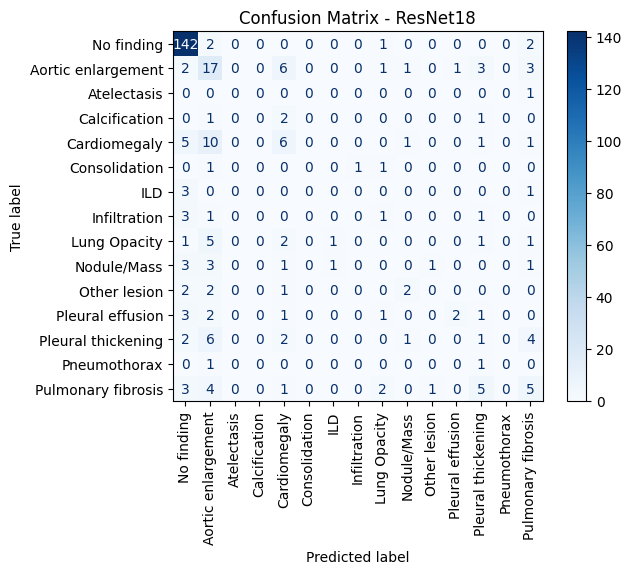

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, lbls in val_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(lbls.numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Create class names list sorted by label_map values
classes = [k for k, v in sorted(label_map.items(), key=lambda x: x[1])]

plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(include_values=True, cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix - ResNet18")
plt.show()
